<a href="https://colab.research.google.com/github/fahadfakrul/python-Ai-and-image-processing/blob/main/Image%20operations%20and%20histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Plot the Image and its histogram + cdf of the original image I chose a color picture of your own choice
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

plt.rcParams['figure.figsize'] = (2,2)
plt.rcParams['figure.dpi'] = 200
### END SOLUTION

# New Section

In [ ]:
# make the image grascale . Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
I = io.imread("/content/wallpaper1.jpg")
I_gray = rgb2gray(I)
print(I.shape)

### END SOLUTION

(163, 310, 3)


In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [ ]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")


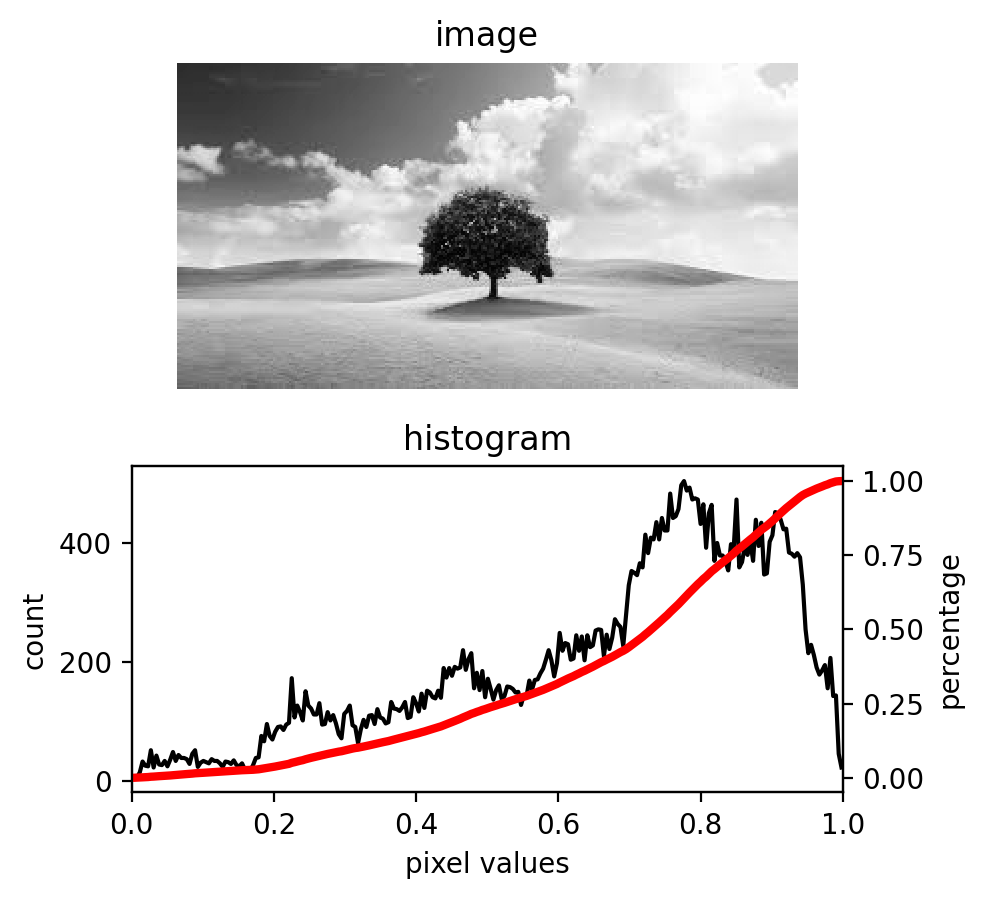

In [ ]:
plt.rcParams['figure.figsize'] = (4, 4)

plot_img_and_hist(I_gray)
plt.show()

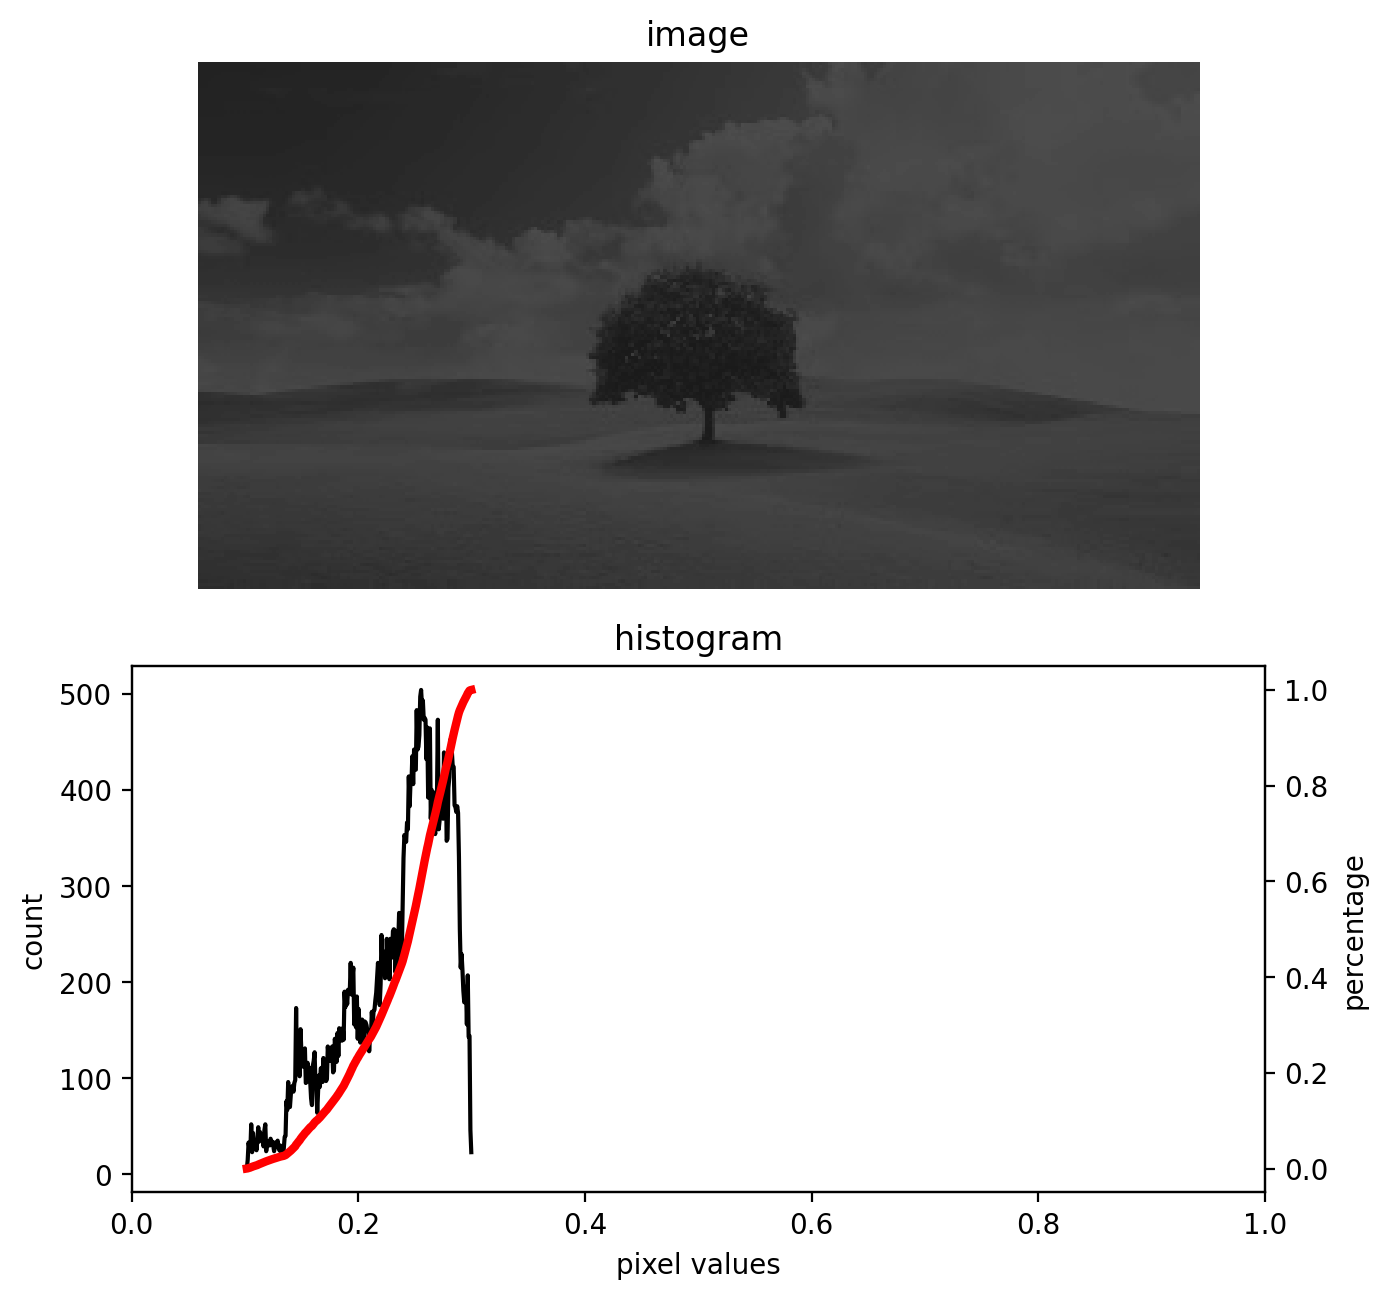

In [ ]:
# Now please degrade the grayscale image using the techniques you learned in class and save tthe degraded image in I_degraded
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
I_degraded=  exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.1, 0.3))
plot_img_and_hist(I_degraded)
plt.show()
### END SOLUTION

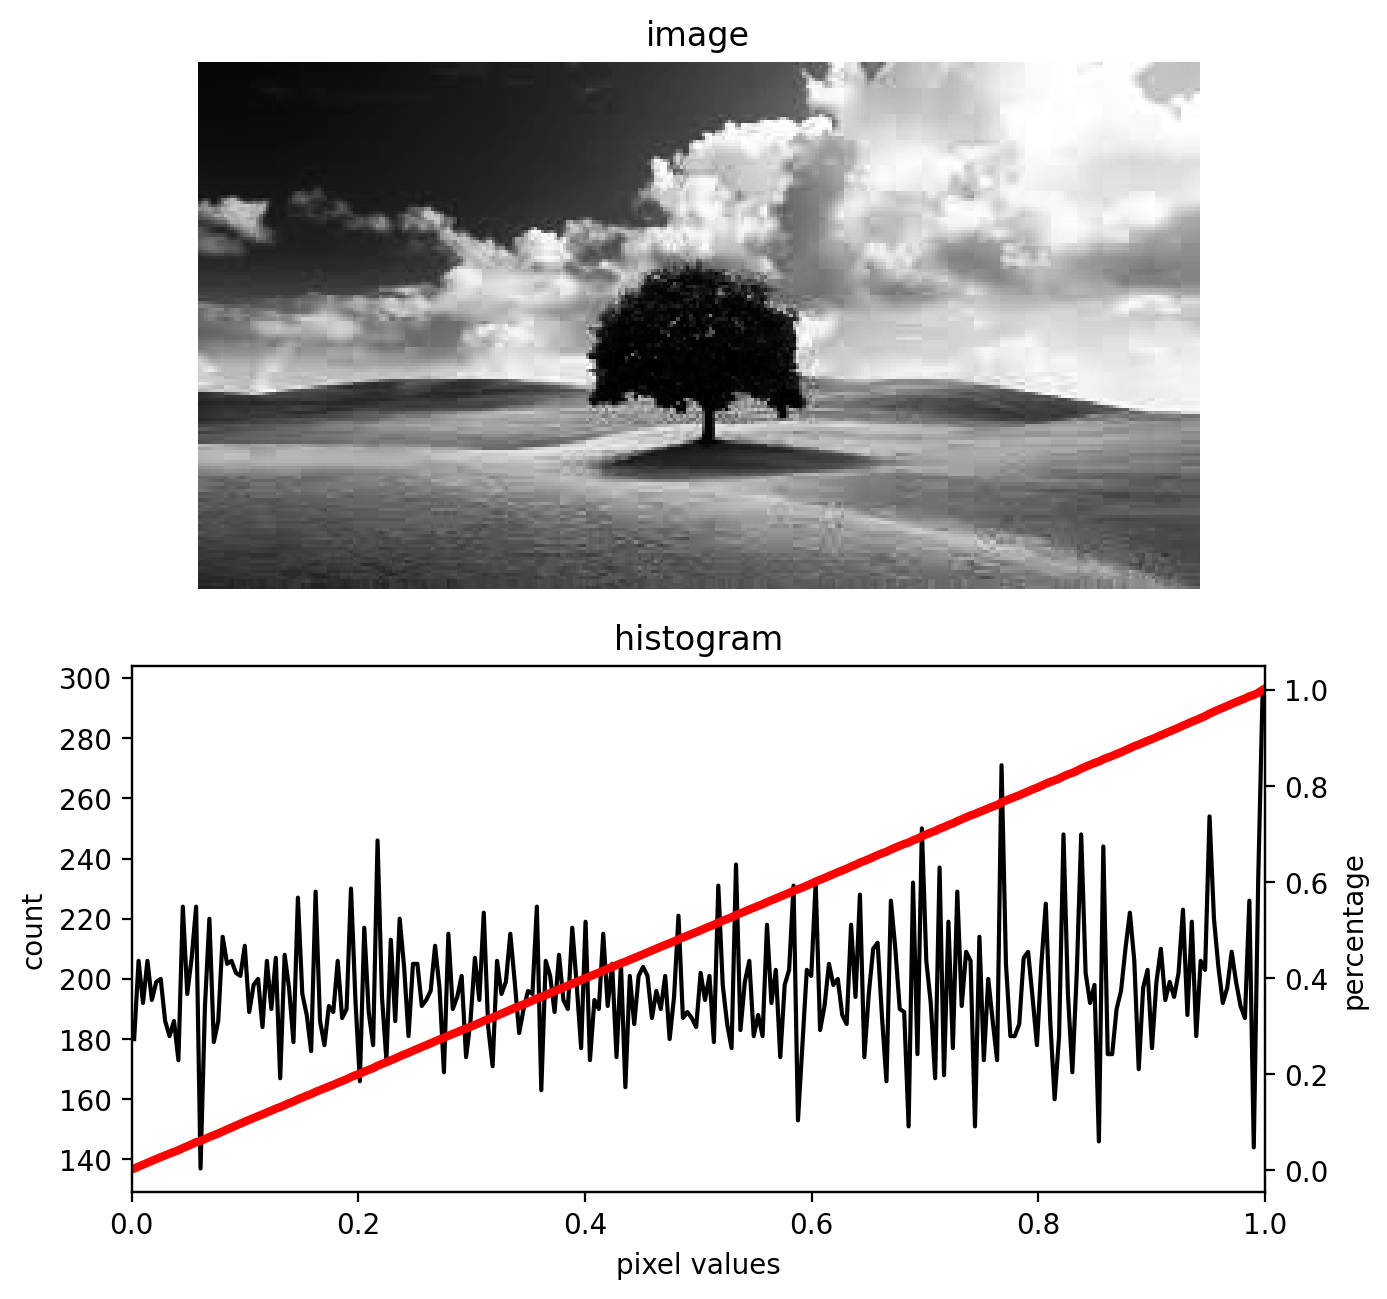

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = None

### BEGIN SOLUTION
I_recon_gray = exposure.equalize_hist(I_degraded)
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_gray)
### END SOLUTION

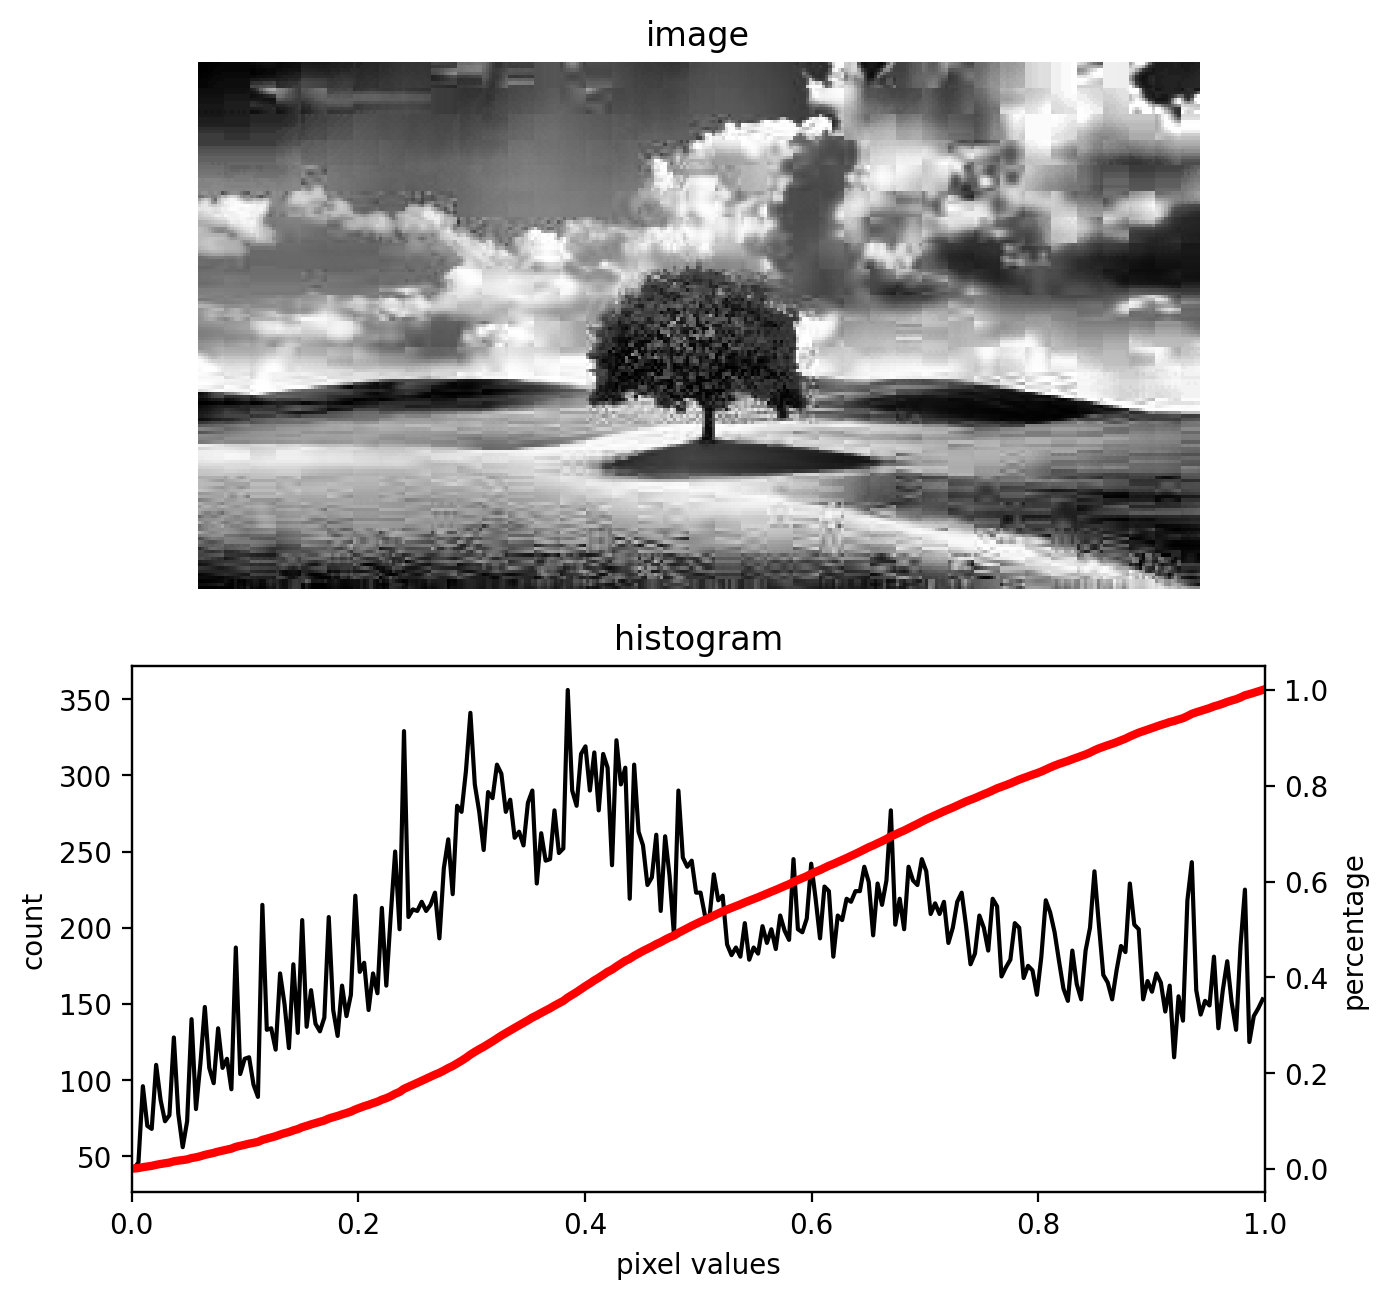

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = None

### BEGIN SOLUTION
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(60,60), clip_limit=0)
plot_img_and_hist(I_recon_gray_2)
### END SOLUTION

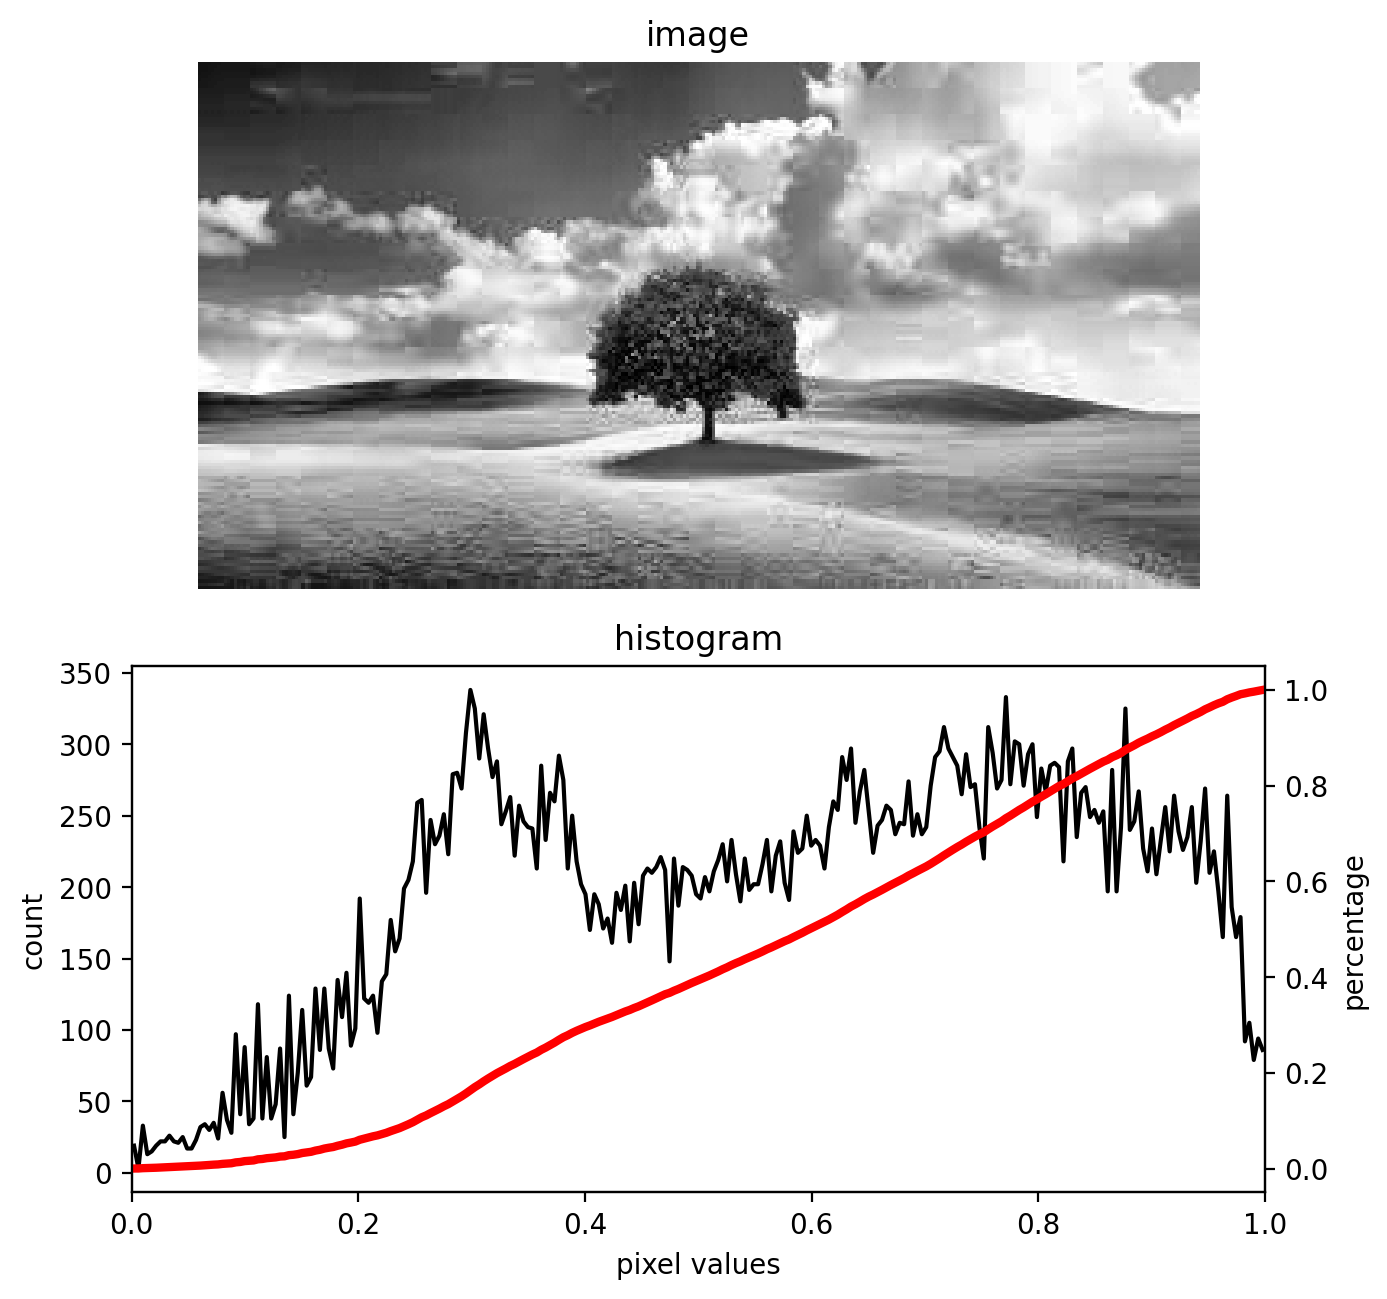

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = None

### BEGIN SOLUTION
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(60, 60), clip_limit=0.01)
plot_img_and_hist(I_recon_gray_3)
### END SOLUTION

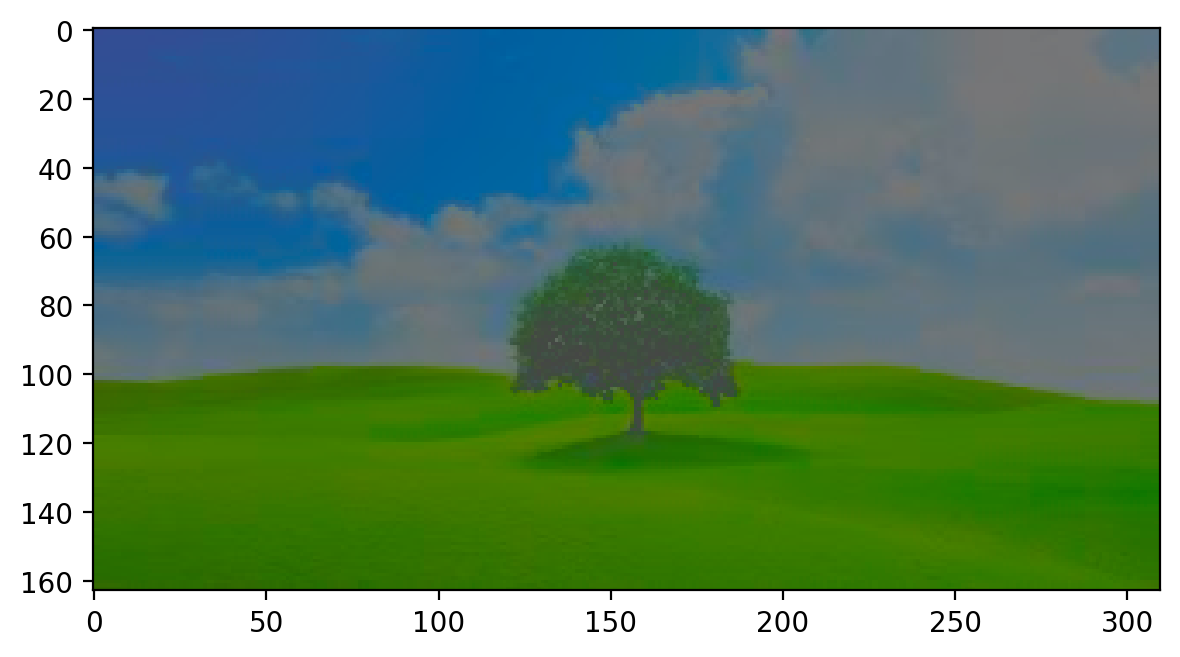

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-3-demo-codes

I_rgb_degraded = None

### BEGIN SOLUTION
Ilab = color.rgb2lab(I)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.3, 0.5))
Ilab[:, :, 0] = Idegraded_l*100
I_rgb_degraded = color.lab2rgb(Ilab)
io.imshow(I_rgb_degraded)
### END SOLUTION

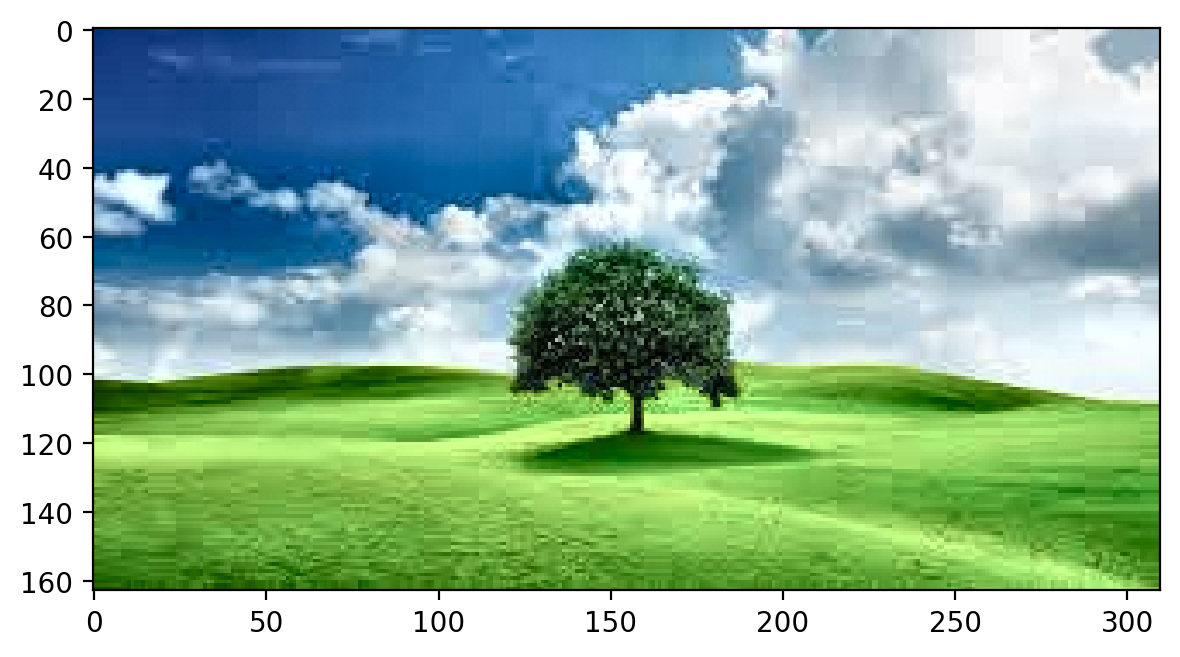

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-3-demo-codes

I_recon_color = None

### BEGIN SOLUTION
Ilab = color.rgb2lab(I_rgb_degraded)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
Ieq = exposure.equalize_adapthist(Ilab[:, :, 0])
Ilab[:, :, 0] = Ieq*100
I_recon_color = color.lab2rgb(Ilab)
io.imshow(I_recon_color)
### END SOLUTION